In [1]:
import json
import matplotlib.pyplot as plt

In [5]:
recog_set = [
    'train',
    'dev',
    'test',
]

distribution = dict()
nBest = 50

In [8]:
for task in recog_set:
    distribution[task] = dict()
    for i in range(1, nBest + 1):
        distribution[task][f'{i}'] = 0
    distribution[task]['out'] = 0

    with open(f'./data/aishell_{task}/{nBest}_best/dataset.json') as f:
        data = json.load(f)
    
    for d in data:
        if (d['ref'] in d['token']):
            ref_index = d['token'].index(d['ref'])
            distribution[task][f'{ref_index + 1}'] += 1
        else:
            distribution[task]['out'] += 1

In [11]:
distribution['train']

{'1': 104332,
 '2': 6232,
 '3': 1819,
 '4': 861,
 '5': 560,
 '6': 420,
 '7': 334,
 '8': 241,
 '9': 165,
 '10': 167,
 '11': 145,
 '12': 112,
 '13': 121,
 '14': 99,
 '15': 103,
 '16': 71,
 '17': 68,
 '18': 55,
 '19': 57,
 '20': 59,
 '21': 63,
 '22': 43,
 '23': 29,
 '24': 35,
 '25': 36,
 '26': 34,
 '27': 38,
 '28': 29,
 '29': 34,
 '30': 24,
 '31': 29,
 '32': 21,
 '33': 23,
 '34': 18,
 '35': 12,
 '36': 21,
 '37': 17,
 '38': 10,
 '39': 14,
 '40': 17,
 '41': 15,
 '42': 18,
 '43': 15,
 '44': 11,
 '45': 13,
 '46': 9,
 '47': 11,
 '48': 15,
 '49': 13,
 '50': 17,
 'out': 3393}

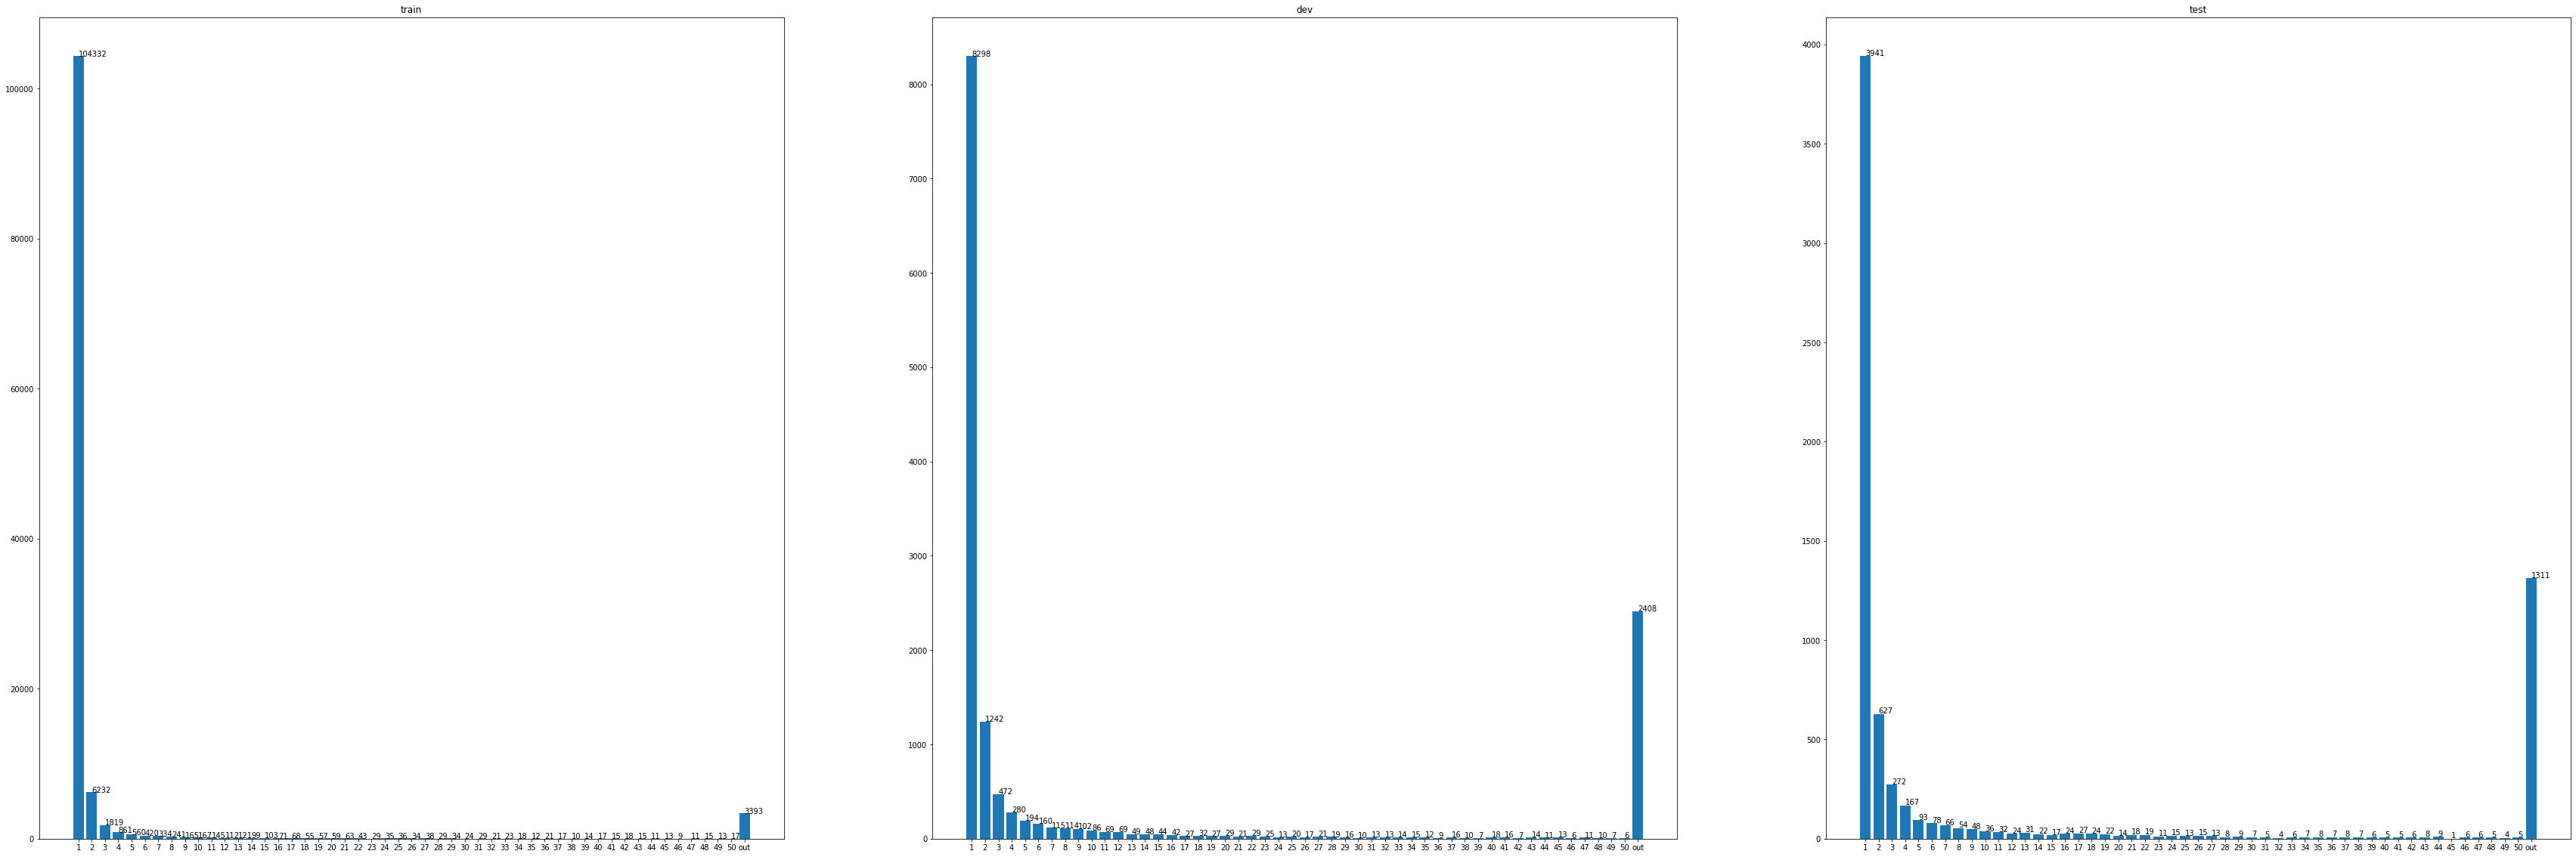

In [14]:
fig, axe = plt.subplots(1,3, figsize = (60,20))

for i, task in enumerate(recog_set):
    x_axis = list(distribution[task].keys())
    y_axis = list(distribution[task].values())
    axe[i].bar(x_axis, y_axis)
    axe[i].set_title(task)
    for j, v in enumerate(y_axis):
        axe[i].text(j , i + v + 2.5, str(v))
plt.show()